# Data Analysis Tools Week 2



In [1]:
!pip install pandas seaborn scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

 
import pandas as pd
import seaborn as sns
import scipy.stats
 
data2 = pd.read_csv('./gapminder.csv', low_memory=False)

Set few variables to numeric

In [2]:
data2['internetuserate'] = pd.to_numeric(data2['internetuserate'], errors='coerce')
data2['polityscore'] = pd.to_numeric(data2['polityscore'], errors='coerce')
 
sub1_change = data2.copy()

Generate a new dataframe by eliminating rows with missing values and categorizing the internet use rate as either 'Low' or 'High'. Similarly, categorize the polity score as either 'Low,' 'Mid,' or 'High.'

In [3]:
sub3_ch = sub1_change[['internetuserate', 'polityscore']].dropna()
sub3_ch['polityscore_binned'] = pd.cut(sub3_ch.polityscore, 3, labels=['Low', 'Mid', 'High'])
sub3_ch['internetuserate_binned'] = pd.cut(sub3_ch.internetuserate, 2, labels=['Low', 'High'])

sub4_change = sub3_ch.copy()

#### Chi-Square test for compare categorical to categorical variable 
 
Contingency table of observed counts

In [4]:
ct1_change = pd.crosstab(sub4_change['internetuserate_binned'], sub4_change['polityscore_binned'])
ct1_change

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,23,27,62
High,5,1,37


Column percentiles for dataset

In [5]:
colsum_change=ct1_change.sum(axis=0)
colpct=ct1_change/colsum_change
colsum_change

polityscore_binned
Low     28
Mid     28
High    99
dtype: int64

Calculate Chi-square value, p-value, expected counts for this dataset

In [6]:
cs1_ch= scipy.stats.chi2_contingency(ct1_change)
cs1_ch

Chi2ContingencyResult(statistic=14.106815515141927, pvalue=0.0008644580686778272, dof=2, expected_freq=array([[20.23225806, 20.23225806, 71.53548387],
       [ 7.76774194,  7.76774194, 27.46451613]]))

Graph percent with internet use rate vs polity score group 

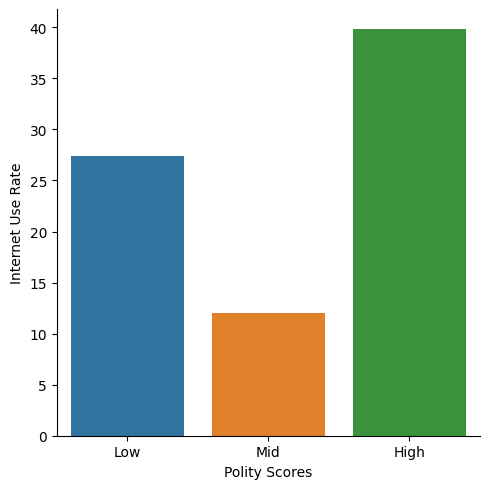

In [8]:
from matplotlib import pyplot as plt


sns.catplot(x="polityscore_binned", y="internetuserate", data=sub4_change, kind="bar", errorbar=None)
plt.xlabel('Polity Scores')
plt.ylabel('Internet Use Rate')
plt.show()

### Perform post-hoc tests

#### Compare Low Polity Score with Mid Polity Score

In [10]:
recode1_change = {'Low': 'Low', 'Mid': 'Mid'}
sub4_change['COMP-Low-v-Mid']= sub4_change['polityscore_binned'].map(recode1_change)

table for observed counts

In [11]:
ct2_ch=pd.crosstab(sub4_change['internetuserate_binned'], sub4_change['COMP-Low-v-Mid'])
ct2_ch

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,23,27
High,5,1


Calculate Column percentage

In [12]:
colsum_ch=ct2_ch.sum(axis=0)
colpct_change=ct2_ch/colsum_ch
colpct_change

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,0.821429,0.964286
High,0.178571,0.035714


Calculate Chi-square value, p-value, expected counts

In [13]:
cs2_change= scipy.stats.chi2_contingency(ct2_ch)
cs2_change

Chi2ContingencyResult(statistic=1.68, pvalue=0.1949244525136538, dof=1, expected_freq=array([[25., 25.],
       [ 3.,  3.]]))

#### the program for compare Low Polity Score with High Polity Score

In [14]:
recode2_change = {'Low': 'Low', 'High': 'High'}
sub4_change['COMP-Low-v-High']= sub4_change['polityscore_binned'].map(recode2_change)

table for observed counts

In [15]:
ct3_change=pd.crosstab(sub4_change['internetuserate_binned'], sub4_change['COMP-Low-v-High'])
ct3_change

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,62,23
High,37,5


Calculate column percentages

In [17]:
colsum_change=ct3_change.sum(axis=0)
colpct_ch=ct3_change/colsum_change
colpct_ch

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,0.626263,0.821429
High,0.373737,0.178571


Calculate chi-square value, p-value, expected counts

In [18]:
cs3_ch= scipy.stats.chi2_contingency(ct3_change)
cs3_ch

Chi2ContingencyResult(statistic=2.9260991012566637, pvalue=0.08715785476442026, dof=1, expected_freq=array([[66.25984252, 18.74015748],
       [32.74015748,  9.25984252]]))

#### calculate Mid Polity Score with High Polity Score

In [19]:
recode3_ch = {'Mid': 'Mid', 'High': 'High'}
sub4_change['COMP-Mid-v-High']= sub4_change['polityscore_binned'].map(recode3_ch)

table of observed counts

In [20]:
ct4_ch=pd.crosstab(sub4_change['internetuserate_binned'], sub4_change['COMP-Mid-v-High'])
ct4_ch

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,62,27
High,37,1


Calculate olumn percentages

In [21]:
colsum_ch=ct4_ch.sum(axis=0)
colpct_change=ct4_ch/colsum_ch
colpct_change

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,0.626263,0.964286
High,0.373737,0.035714


Calculate hi-square value, p-value, expected counts

In [22]:
cs4_ch= scipy.stats.chi2_contingency(ct4_ch)
cs4_ch

Chi2ContingencyResult(statistic=10.33624298979488, pvalue=0.0013044325086655102, dof=1, expected_freq=array([[69.37795276, 19.62204724],
       [29.62204724,  8.37795276]]))